In [6]:
library(linseed)

In [33]:
getwd()


[1] "/labseq/projects/ppmi/wb_rna"

In [32]:
setwd('/labseq/projects/ppmi/wb_rna/')

In [35]:
ppmi <- LinseedObject$new("vsdCountsPPMI_fullB38.tsv", samples=10:42, topGenes=10000)

File vsdCountsPPMI_fullB38.tsv exists
Reading dataset from file vsdCountsPPMI_fullB38.tsv
Make sure file is tab-separated and has row and column names
File successfully read


Warning message in cor(t(self$exp$full$norm), method = "spearman"):
Sampling weights [===========================] 100% eta:  0s


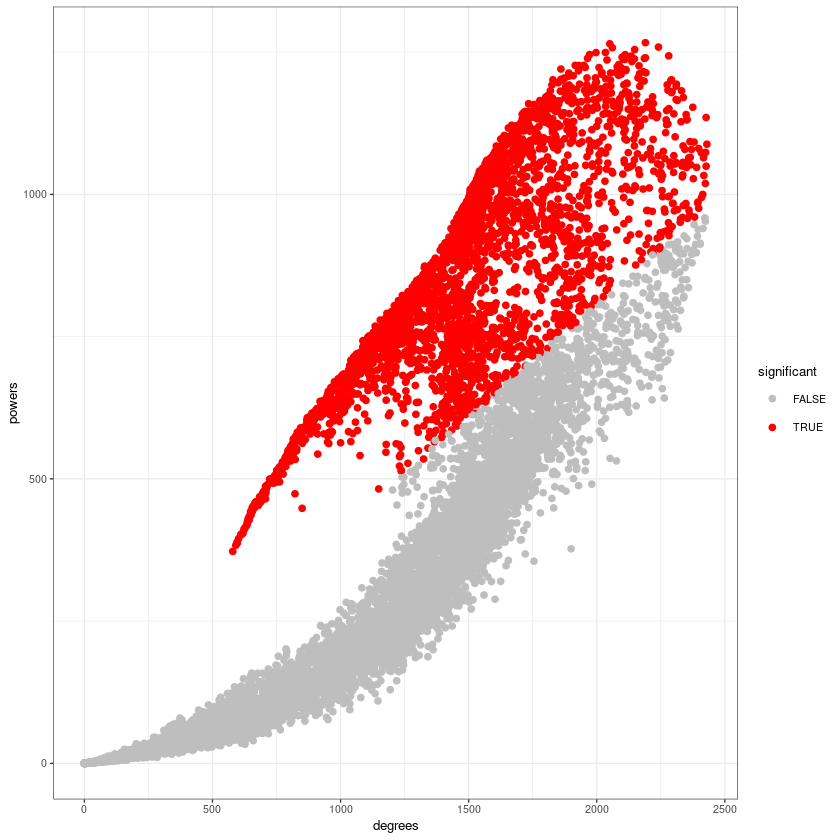

In [36]:
##colinearity networks
ppmi$calculatePairwiseLinearity()
lo$calculateSpearmanCorrelation()
lo$calculateSignificanceLevel(100)
lo$significancePlot(0.01)

In [4]:
lo$filterDatasetByPval(0.01)
## Total number of genes is 10000

## The number of genes after filtering is 3297

Total number of genes is 10000
The number of genes after filtering is 3297


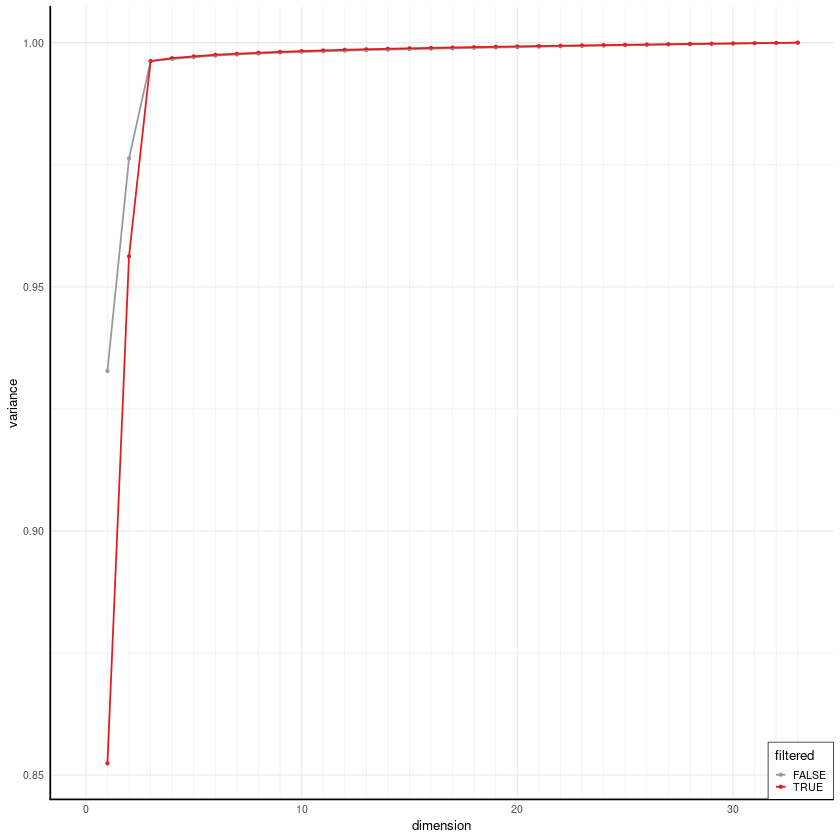

In [5]:
lo$svdPlot()

Warning message:
“Using size for a discrete variable is not advised.”

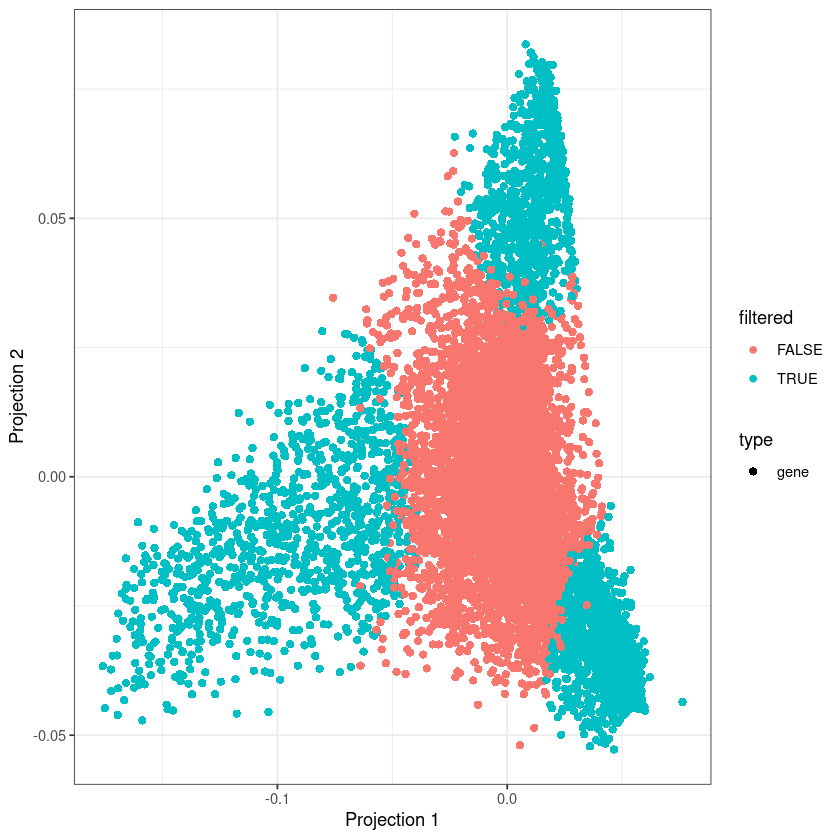

In [6]:
##visualize after filtering, projection plot
lo$setCellTypeNumber(3)
lo$project("full") # projecting full dataset
lo$projectionPlot(color="filtered")

In [7]:
##deconvolution
lo$project("filtered")
lo$smartSearchCorners(dataset="filtered", error="norm")

Final vector is 


4 5 2

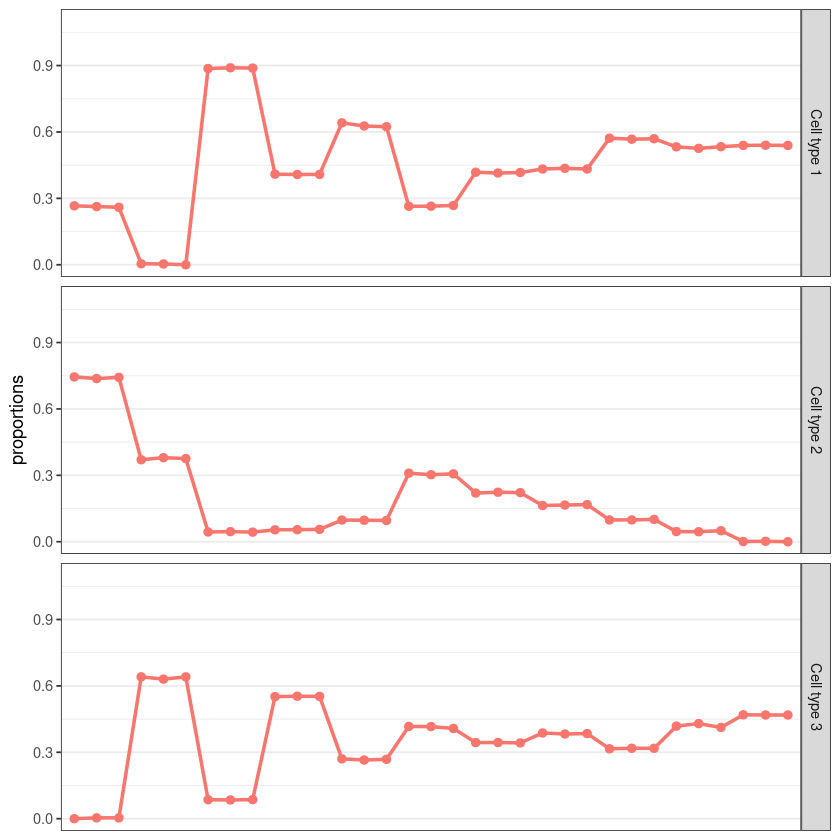

In [8]:
## Final vector is

## 4 1 5

## 
lo$deconvolveByEndpoints()
plotProportions(lo$proportions)

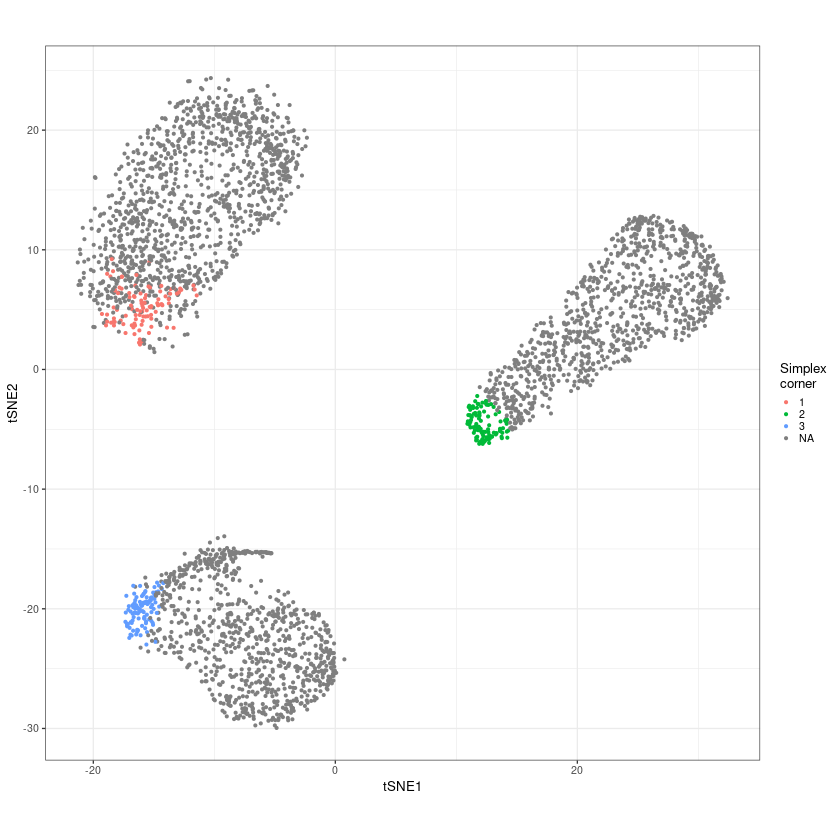

In [9]:
# lets select 100 genes closest to the simplex corners 
##tsne
lo$selectGenes(100)
lo$tsnePlot()

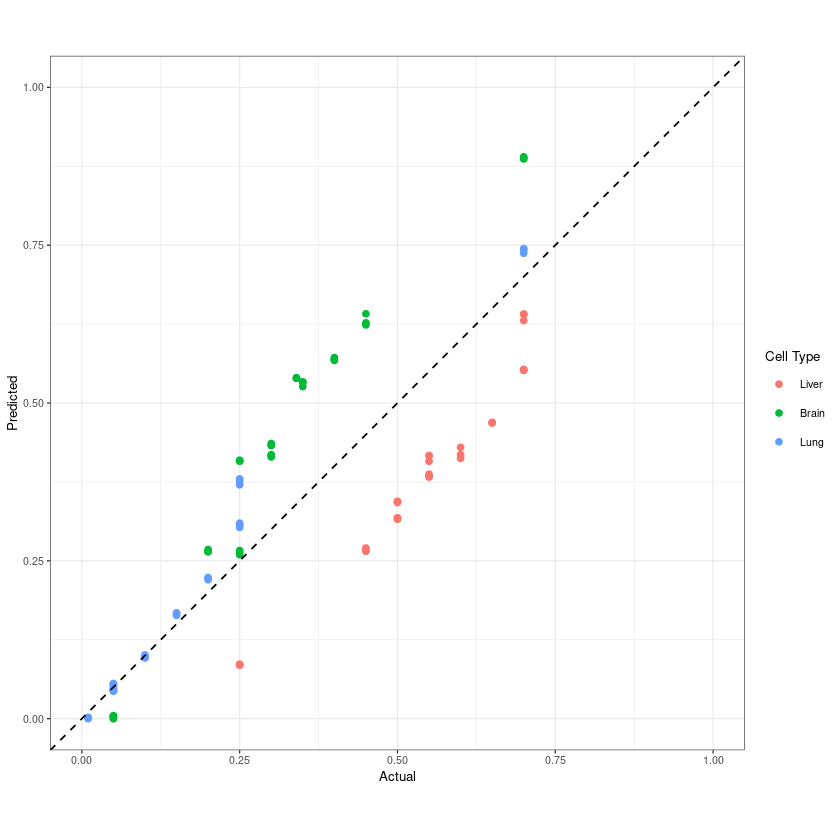

In [10]:
data("proportionsLiverBrainLung")
dotPlotPropotions(lo$proportions, proportionsLiverBrainLung[, 10:42], guess=TRUE)